In [2]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

pd.options.display.max_columns= 40



In [3]:
# https://www.drivendata.org/competitions/57/nepal-earthquake/data/

df_test = pd.read_csv("../data/test_values.csv")

df_train_labels = pd.read_csv("../data/train_labels.csv")
df_train_values = pd.read_csv("../data/train_values.csv")

df_submiss_format = pd.read_csv("../data/submission_format.csv")



The definition of columns is explained at this web page:
https://www.drivendata.org/competitions/57/nepal-earthquake/page/136/

In [4]:
print(df_train_values.shape)

df_train_values.head(10)

(260601, 39)


,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
5,333020,8,558,6089,2,10,9,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,1,1,0,0,0,0,0,0,0,0,0
6,728451,9,475,12066,2,25,3,4,n,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
7,475515,20,323,12236,2,0,8,6,t,w,q,v,x,s,u,0,0,0,0,0,1,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
8,441126,0,757,7219,2,15,8,6,t,r,q,f,q,s,d,0,1,0,0,0,0,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
9,989500,26,886,994,1,0,13,4,t,i,n,v,j,s,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


#### Preliminaries
- check data types
- check missing values
- check..?

#### Check data types

In [22]:
df_train_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [35]:
# Since a lot of the features are categorical
categorical_variables = [
    'building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'land_surface_condition', 'foundation_type', 'roof_type',
    'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
    'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
    'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other',
    'legal_ownership_status', 'has_secondary_use', 'has_secondary_use_agriculture', 'has_secondary_use_hotel',
    'has_secondary_use_rental', 'has_secondary_use_institution', 'has_secondary_use_school', 'has_secondary_use_industry',
    'has_secondary_use_health_post', 'has_secondary_use_gov_office', 'has_secondary_use_use_police', 'has_secondary_use_other'
]
df_train_values[categorical_variables] = df_train_values[categorical_variables].astype("str")

# List of numeric variables:
numeric_variables = ["count_floors_pre_eq", "age", "area_percentage", "height_percentage", "count_families"  ]
df_train_values[numeric_variables] = df_train_values[numeric_variables].astype("float64")
df_train_values.head(2)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2.0,30.0,6.0,5.0,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1.0,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2.0,10.0,8.0,7.0,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1.0,0,0,0,0,0,0,0,0,0,0,0


#### Checking df_train_labels and its dtypes

In [36]:
df_train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   building_id   260601 non-null  int64
 1   damage_grade  260601 non-null  int64
dtypes: int64(2)
memory usage: 4.0 MB


In [37]:
df_train_labels[["building_id"]] = df_train_labels[["building_id"]].astype("str")

#### Check the uniqueness of a building ID

561991     1
729986     1
139728     1
522713     1
90738      1
          ..
718633     1
1012373    1
929092     1
173942     1
373954     1
Name: building_id, Length: 260601, dtype: int64

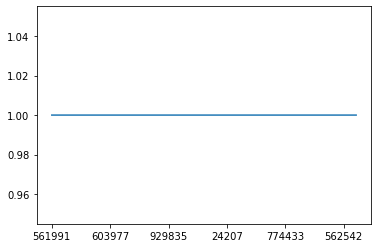

In [42]:
df_train_labels["building_id"].value_counts().plot()
df_train_labels["building_id"].value_counts().sort_values(ascending=False)

In [78]:
train_set = pd.merge(df_train_values, df_train_labels, how="left", on=["building_id"])
train_set = train_set.drop(columns=["building_id"])

In [79]:
train_set["damage_grade"]

0         3
1         2
2         3
3         2
4         3
         ..
260596    2
260597    3
260598    3
260599    2
260600    3
Name: damage_grade, Length: 260601, dtype: int64

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_set.drop(columns=["damage_grade"]), train_set["damage_grade"], test_size=0.33, random_state=42)

In [94]:
from sklearn.preprocessing import LabelBinarizer

l_encoder = LabelBinarizer()
l_encoder.fit(y_train)
y = l_encoder.transform(y_train)

In [100]:
y

array([[0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       ...,
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0]])

In [113]:
X_train_numeric = X_train[numeric_variables]

#### Train phase


In [114]:
from sklearn.linear_model import LogisticRegression
log_regres = LogisticRegression(multi_class="ovr")

log_regres.fit(X=X_train_numeric, y=y_train)

LogisticRegression(multi_class='ovr')

#### Test/performance phase 

In [115]:
X_test_numeric = X_test[numeric_variables]

In [121]:
y_test = pd.DataFrame(y_test)
y_test["y_pred"] = log_regres.predict(X_test_numeric)

y_test.head()

,damage_grade,y_pred
111801,2,2
91817,2,2
251661,2,2
205479,2,2
22618,2,2


In [124]:
from sklearn.metrics import accuracy_score

print(f"Overall, unweighted accuracy score: {accuracy_score(y_true=y_test['damage_grade'], y_pred=y_test['y_pred'])}")



Overall, unweighted accuracy score: 0.5680996290654543


56% seems decent. However, what is the base accuracy actually? 

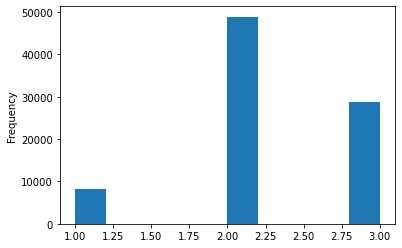

In [128]:
y_test["damage_grade"].plot.hist()

In [130]:
y_test["damage_grade"].value_counts()/y_test.shape[0]

2    0.568925
3    0.334620
1    0.096455
Name: damage_grade, dtype: float64

##### It seems I could have reached a similar performance by guessing everything to be a 2, so it seems to perform as well as our guessing baseline

In [131]:
# Notebook 2:
 # do optimize the score performance by:
    - adjusting the score mechanism to f1 scoring
    - the idea of the ideal threshold that maximizes the f1 score
    - introducing cross validation for doing a hyperparameter search # (first with the LogisticRegressionCV variant?!)
    - do some preprocessing on the numeric variables (standardize)
    
    
# Other options:
- use more variables
- use a different algorithm (and maybe the labelbinarizer)
- do some preprocessing on the categorical variables


IndentationError: unexpected indent (<ipython-input-131-5f62701febb2>, line 3)

In [ ]:
# To do here: ROC curve
# Make an actual prediction on the dataset online